In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas
import os


In [2]:
main_df = pandas.read_csv("./hotel_bokings_2016.csv", sep=',')

In [3]:
main_df


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests
0,3738,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02,1,2.0
1,3739,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02,1,4.0
2,3740,Resort Hotel,1,2,2016,January,1,1,0,1,...,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01,1,2.0
3,3741,Resort Hotel,0,88,2016,January,1,1,0,2,...,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03,2,2.0
4,3742,Resort Hotel,1,20,2016,January,1,1,0,2,...,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56702,104142,City Hotel,0,17,2016,December,53,30,2,5,...,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06,7,2.0
56703,104145,City Hotel,0,177,2016,December,53,30,2,5,...,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06,7,0.0
56704,104147,City Hotel,0,107,2016,December,53,31,2,5,...,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07,7,2.0
56705,104216,City Hotel,0,310,2016,December,53,27,2,10,...,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08,12,2.0


In [4]:
main_df_correlation = main_df.corr()
main_df_correlation

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,days_in_hotel,all_guests
Unnamed: 0,1.000000,-0.300641,-0.072053,NaN,0.166995,0.007490,-0.145470,-0.201397,-0.005770,-0.007962,...,0.006619,-0.019679,-0.665054,-0.342605,0.009822,0.149129,-0.113609,0.160162,-0.207425,-0.013348
is_canceled,-0.300641,1.000000,0.282840,NaN,0.040619,-0.001884,-0.010207,0.036181,0.040557,0.005767,...,-0.056272,-0.133375,-0.091284,-0.025942,0.097674,0.048452,-0.201735,-0.267463,0.022967,0.030426
lead_time,-0.072053,0.282840,1.000000,NaN,0.202826,0.000032,0.057738,0.191726,0.105770,-0.061545,...,-0.075189,0.010061,-0.103544,0.191224,0.259226,-0.084956,-0.119589,-0.124194,0.165697,0.039663
arrival_date_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,0.166995,0.040619,0.202826,NaN,1.000000,0.043216,0.038394,0.040980,0.055114,0.024288,...,-0.002104,0.025085,-0.005897,0.235133,-0.026349,0.144624,-0.007676,0.128717,0.045667,0.057144
arrival_date_day_of_month,0.007490,-0.001884,0.000032,NaN,0.043216,1.000000,-0.002414,-0.014670,0.003844,0.019200,...,-0.004661,0.025172,-0.017340,0.074321,0.013992,0.016794,0.006463,0.002578,-0.011890,0.015114
stays_in_weekend_nights,-0.145470,-0.010207,0.057738,NaN,0.038394,-0.002414,1.000000,0.492611,0.102202,0.037920,...,-0.038162,0.071853,0.113716,0.080767,-0.065003,0.030313,-0.022462,0.083835,0.760792,0.103036
stays_in_week_nights,-0.201397,0.036181,0.191726,NaN,0.040980,-0.014670,0.492611,1.000000,0.102559,0.029443,...,-0.053141,0.096524,0.142399,0.139661,-0.005069,0.034298,-0.037205,0.053987,0.939563,0.098444
adults,-0.005770,0.040557,0.105770,NaN,0.055114,0.003844,0.102202,0.102559,1.000000,0.026723,...,-0.131937,-0.047598,-0.062558,0.211586,-0.008229,0.257982,0.018927,0.166134,0.116692,0.779546
children,-0.007962,0.005767,-0.061545,NaN,0.024288,0.019200,0.037920,0.029443,0.026723,1.000000,...,-0.023044,0.040341,0.015404,0.050497,-0.040986,0.301741,0.062196,0.079194,0.036876,0.628193


<AxesSubplot:>

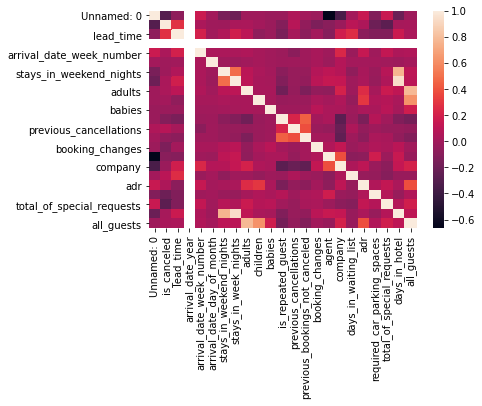

In [5]:
sns.heatmap(main_df_correlation)

<AxesSubplot:>

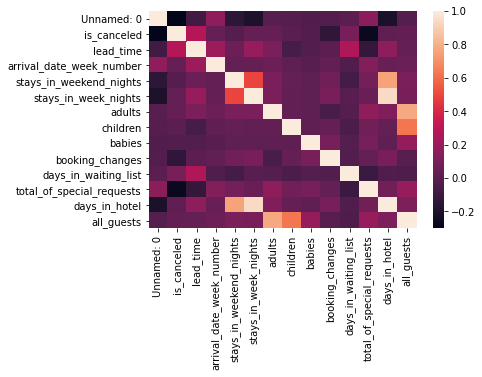

In [6]:
df = main_df.copy()
df = df.drop(columns=['arrival_date_year',
                      'required_car_parking_spaces',
                      'arrival_date_day_of_month',
                      'meal', 'country',
                      'market_segment', 'distribution_channel',
                      'is_repeated_guest', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'reserved_room_type',
                      'deposit_type', 'agent', 'company', 'customer_type', 'adr',
                      'reservation_status', 'reservation_status_date'
                     ])
sns.heatmap(df.corr())


In [7]:
plt.rcParams['figure.figsize'] = [15, 5]
def plot_two_columns(col_one_name, col_two_name):
    x = df[col_one_name]
    y = df[col_two_name]
    plt.ylabel(col_two_name)
    plt.xlabel(col_one_name)
    plt.scatter(x,y, marker='.', alpha=0.05, cmap='viridis')

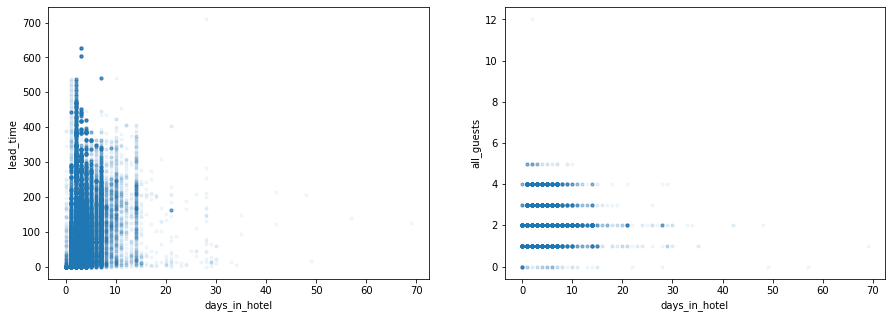

In [8]:
#Zaleznosc dni spedzaonych od planowanej rezerwacji
plt.subplot(1,2,1)
plot_two_columns('days_in_hotel', 'lead_time')

#Zaleznosc dni spedzoncyh od gosci
plt.subplot(1,2,2)
plot_two_columns('days_in_hotel', 'all_guests')


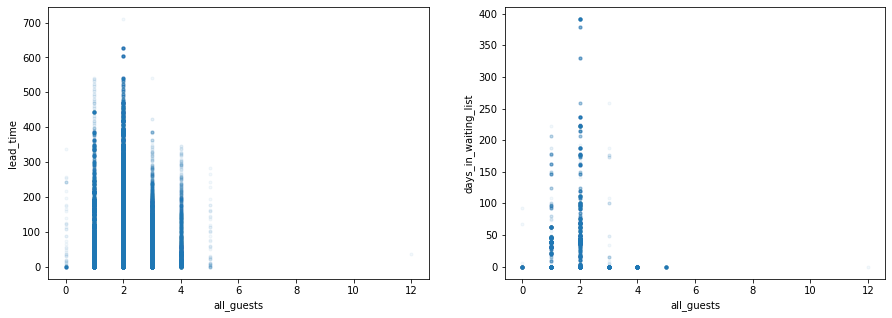

In [9]:
#Zaleznosc gosci od planowanej rezerwacji
plt.subplot(1,2,1)
plot_two_columns('all_guests', 'lead_time')

#Zaleznosc gosci od dlugosci oczekiwania na potwierdzenie rezerwacji
plt.subplot(1,2,2)
plot_two_columns('all_guests', 'days_in_waiting_list')

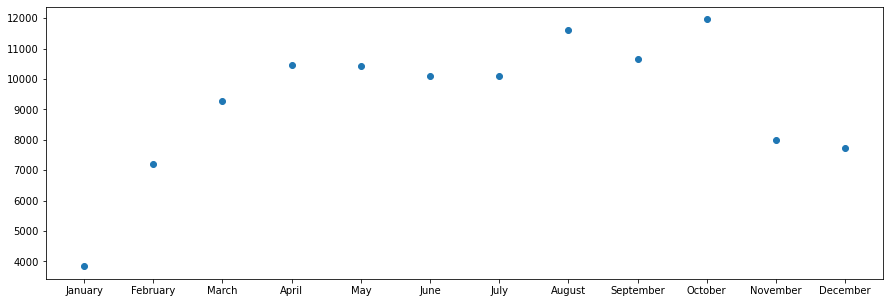

In [10]:
#Miesiac a ilosc gosci
months_to_guests = {}
for i in range(len(df)):
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)


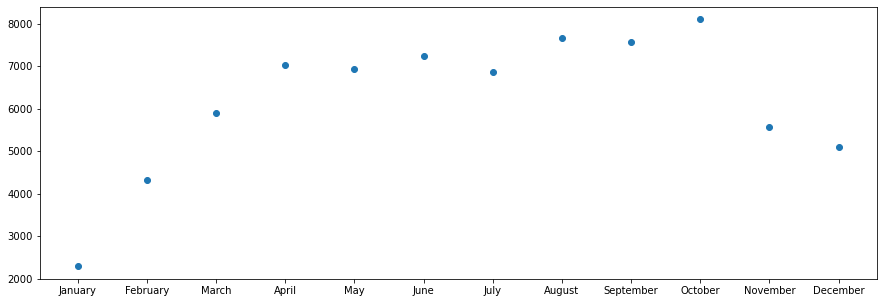

In [11]:
#Miesiac a ilosc gosci dla city hotel
months_to_guests = {}
for i in range(len(df)):
    if df['hotel'][i] != 'City Hotel':
        continue
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)

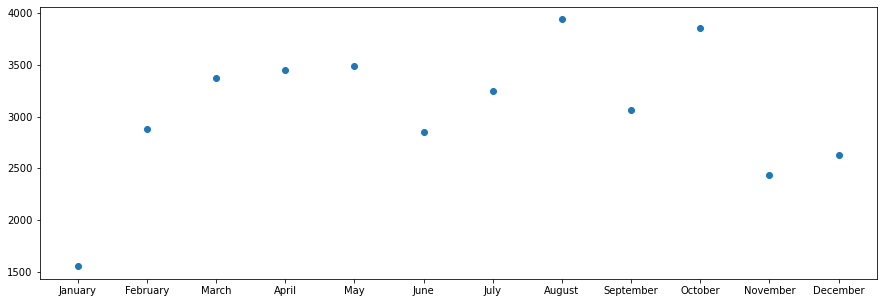

In [12]:
#Miesiac a ilosc gosci dla city hotel
months_to_guests = {}
for i in range(len(df)):
    if df['hotel'][i] != 'Resort Hotel':
        continue
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)

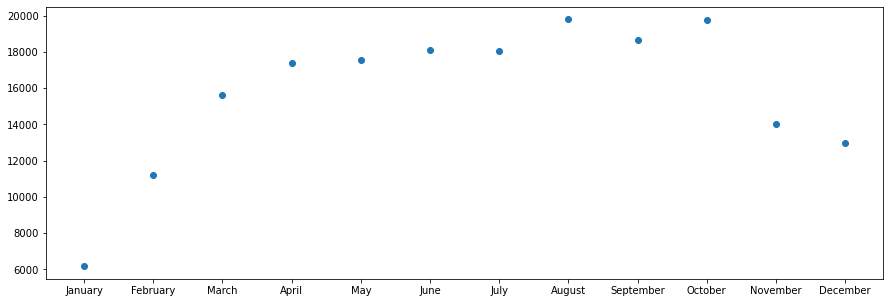

In [13]:
#Miesiac a czas pobytu
months_to_guests = {}
for i in range(len(df)):
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['days_in_hotel'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)

In [14]:
#Elementy odosobnione

In [15]:
#Metoda 3 sigma
def show_isolated_cases(column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    limit = 3.0 * std
    
    idx = 0
    for value in df[column_name]:
        if np.fabs(value - mean) > limit:
            plt.plot(idx, value, marker='.', color='red')
        else:
            plt.plot(idx, value, marker='.', color='blue')
        idx += 1
    plt.ylabel(column_name)
    plt.xlabel('Liczba porzadkowa')

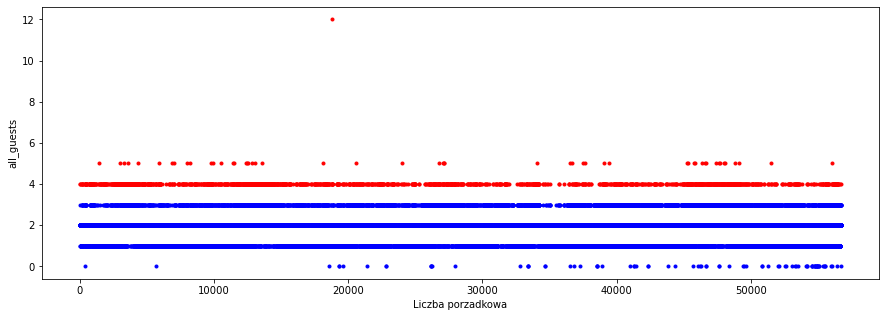

In [15]:
#Liczba gosci
show_isolated_cases('all_guests')

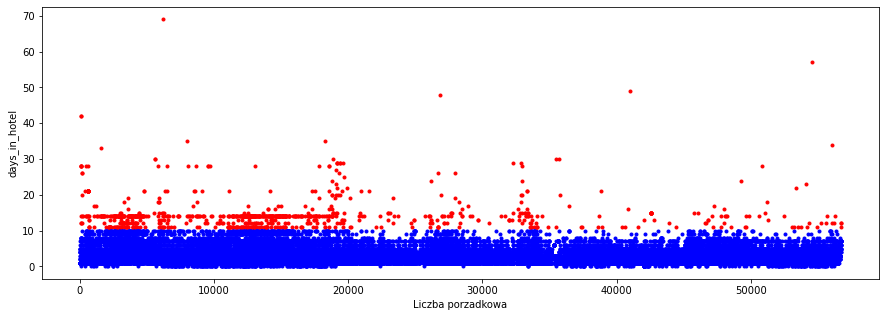

In [16]:
#Czas pobytu
show_isolated_cases('days_in_hotel')

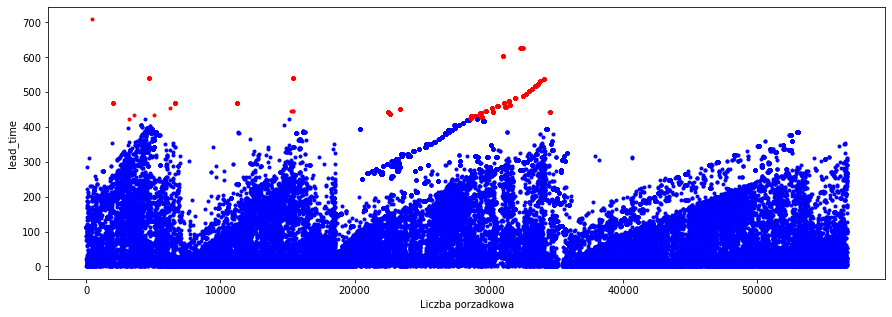

In [17]:
#Wczesniejsza rezerwacja
show_isolated_cases('lead_time')

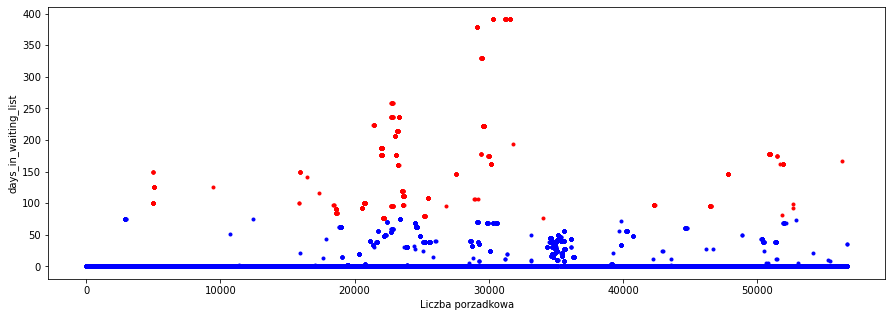

In [18]:
#Oczekiwanie na akceptacje rezerwacji
show_isolated_cases('days_in_waiting_list')


In [16]:
def remove_outliners(df, column_name):
    drop_indexes = []
    mean = df[column_name].mean()
    std = df[column_name].std()
    limit = 3.0*std
    for i in range(len(df)):
        value = df[column_name][i]
        if np.fabs(value - mean) > limit:
            drop_indexes.append(i)
    return drop_indexes



In [17]:
to_remove_labels = remove_outliners(df, 'days_in_waiting_list')
without_outliners_df = df[['all_guests', 'days_in_waiting_list', 'lead_time', 'days_in_hotel']].copy()
without_outliners_df = without_outliners_df.drop(to_remove_labels)

In [18]:
df.shape[0]


56707

In [19]:
without_outliners_df.shape[0]


55843

In [20]:
#Klasteryzacja
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
silhouette_scores = []

for clusters_number in range(2, 100):
    kmeans = KMeans(n_clusters = clusters_number, n_init=10, max_iter=350, random_state=42)
    kmeans.fit(without_outliners_df)
    sil_score = silhouette_score(X=without_outliners_df, labels=kmeans.labels_, n_jobs=-1)
    silhouette_scores.append(sil_score)

silhouette_scores.index(max(silhouette_scores))

0

In [41]:
len(silhouette_scores)


98

In [42]:
silhouette_scores
'''
[0.6625809632477712,
 0.6274543319865823,
 0.5935516355208911,
 0.5922048378878004,
 0.568616343065147,
 0.564840676646399,
 0.5581490045935374,
 0.5500703650153356,
 0.5389665314975747,
 0.5401054264448517,
 0.5386119806739338,
 0.5441034670025879,
 0.5307739233205127,
 0.5204050282105911,
 0.5387778480442789,
 0.5208429228360136,
 0.5276329866013878,
 0.5237164631441119,
 0.5249426705960198,
 0.510577527359014,
 0.5106694552073243,
 0.5063865828579099,
 0.5038634846303832,
 0.5035274581826138,
 0.5002861365299865,
 0.5061615355343811,
 0.5039666897885057,
 0.5003772842532245,
 0.48469054829673297,
 0.48095368977764186,
 0.4948028731127124,
 0.4942189419070762,
 0.48258279407097854,
 0.48371718782394,
 0.4851892040086357,
 0.4658508155337847,
 0.4751424699020825,
 0.47535846836364126,
 0.4742449276874483,
 0.46821055887534874,
 0.4677546601997764,
 0.46298166220583375,
 0.4504757348617625,
 0.46687506143366464,
 0.46716737307457573,
 0.4669893921926613,
 0.45703914955931957,
 0.4522058125215452,
 0.45216917422326336,
 0.4525935619275125,
 0.4418374743028516,
 0.43861413562770607,
 0.45000394630760965,
 0.43512801182709804,
 0.43023363587116364,
 0.4325855486214341,
 0.4279468613117822,
 0.4283111279944031,
 0.42890054202989103,
 0.4299437139874537,
 0.4298132196695702,
 0.4284994209869803,
 0.42821635575886474,
 0.42123174806781255,
 0.4218715314105343,
 0.4204332357795635,
 0.42093091730193005,
 0.42095447074325565,
 0.4209701731345895,
 0.40263795829353216,
 0.4002119736064322,
 0.3967703146122969,
 0.3970256650637899,
 0.39832860957238775,
 0.39736281118726263,
 0.39816052320443185,
 0.39896408063764194,
 0.39959875776258397,
 0.3997450565121839,
 0.3997362740190977,
 0.4004604123166818,
 0.399258972170826,
 0.3994753934146685,
 0.39910842114345785,
 0.39918082639570723,
 0.39847995605680325,
 0.3965355350398642,
 0.39671435986492803,
 0.3861553496998201,
 0.3934199539731293,
 0.39461877436263315,
 0.39447660101396737,
 0.3955770533222602,
 0.3935543309562322,
 0.3934578519958688,
 0.39447221482749106,
 0.394281009576776,
 0.3946718293593504]'''


[0.6625809632477712,
 0.6274543319865823,
 0.5935516355208911,
 0.5922048378878004,
 0.568616343065147,
 0.564840676646399,
 0.5581490045935374,
 0.5500703650153356,
 0.5389665314975747,
 0.5401054264448517,
 0.5386119806739338,
 0.5441034670025879,
 0.5307739233205127,
 0.5204050282105911,
 0.5387778480442789,
 0.5208429228360136,
 0.5276329866013878,
 0.5237164631441119,
 0.5249426705960198,
 0.510577527359014,
 0.5106694552073243,
 0.5063865828579099,
 0.5038634846303832,
 0.5035274581826138,
 0.5002861365299865,
 0.5061615355343811,
 0.5039666897885057,
 0.5003772842532245,
 0.48469054829673297,
 0.48095368977764186,
 0.4948028731127124,
 0.4942189419070762,
 0.48258279407097854,
 0.48371718782394,
 0.4851892040086357,
 0.4658508155337847,
 0.4751424699020825,
 0.47535846836364126,
 0.4742449276874483,
 0.46821055887534874,
 0.4677546601997764,
 0.46298166220583375,
 0.4504757348617625,
 0.46687506143366464,
 0.46716737307457573,
 0.4669893921926613,
 0.45703914955931957,
 0.452205

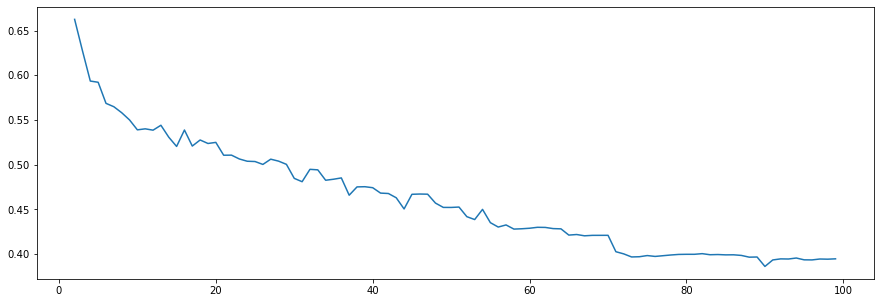

In [43]:
plt.plot([i for i in range(2,100)], silhouette_scores)

In [21]:
kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=350, random_state=42)
kmeans_result = kmeans.fit(without_outliners_df)

In [22]:
import matplotlib.cm as cm
def show_clusters(x_column, y_column, df, kmeans_result):
    colors = cm.nipy_spectral(kmeans_result.labels_.astype(float) / len(kmeans_result.cluster_centers_))
    x = df[x_column]
    y = df[y_column]
    plt.scatter(x, y, s=30,lw=0, alpha=0.7, marker='.', c=colors, edgecolor='k')
    
    #cluster_centers = kmeans_result.cluster_centers_
    
    #plt.scatter(cluster_centers[:, df.columns.get_loc(x_column)],
    #           cluster_centers[:, df.columns.get_loc(y_column)],
    #                          marker='o', c='white', alpha=1, s=250, edgecolor='k')
    
    #for i, c in enumerate(cluster_centers):
    #        plt.scatter(c[df.columns.get_loc(x_column)],
    #                  c[df.columns.get_loc(y_column)],
    #                   marker='$%d$'%i, alpha=1, s=50, edgecolor='k')
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

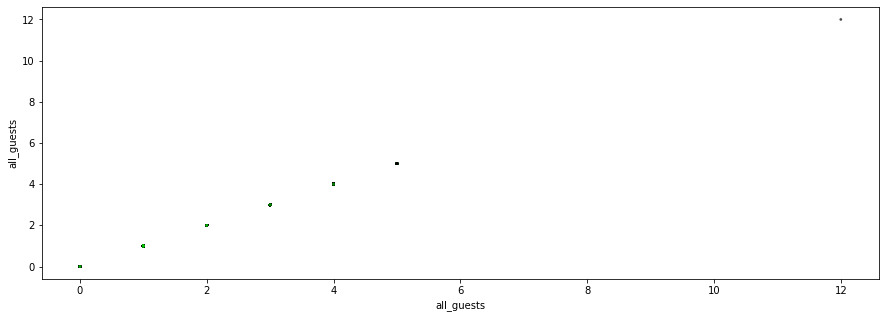

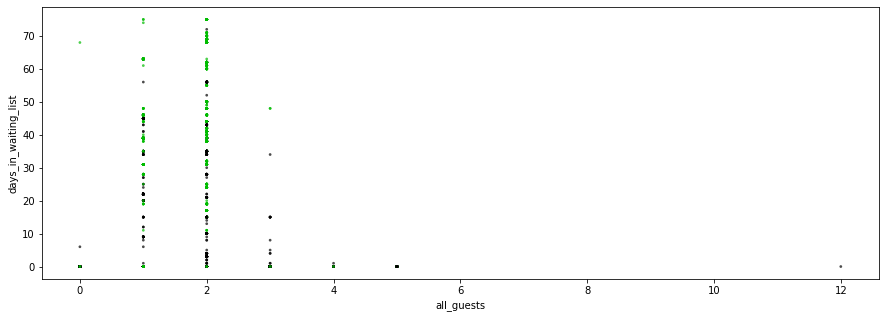

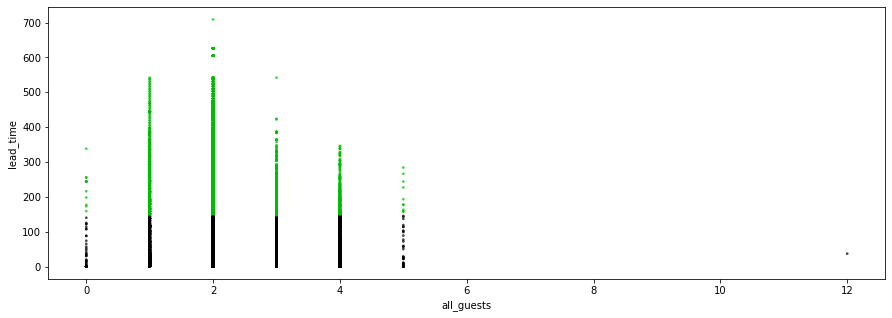

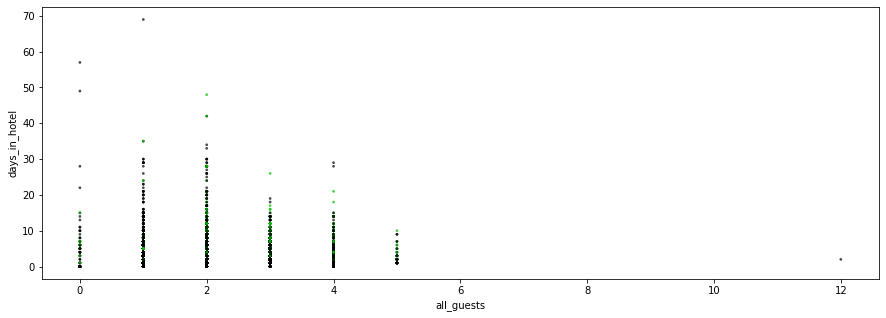

In [23]:
#All guests vs others
for i in without_outliners_df:
    show_clusters('all_guests', i, without_outliners_df, kmeans_result)

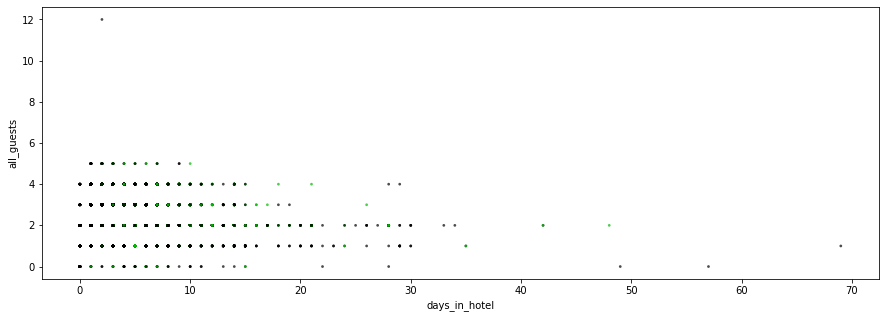

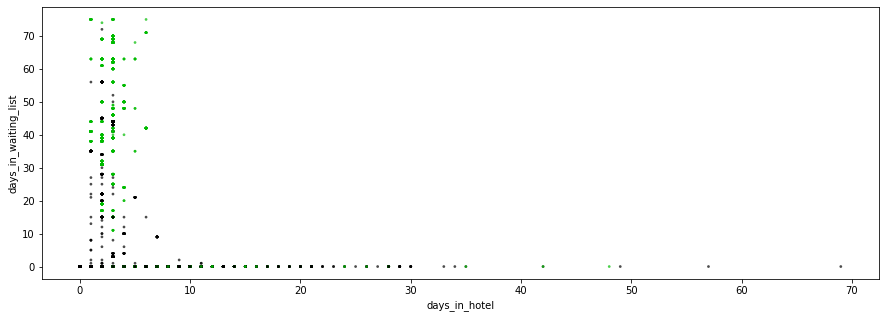

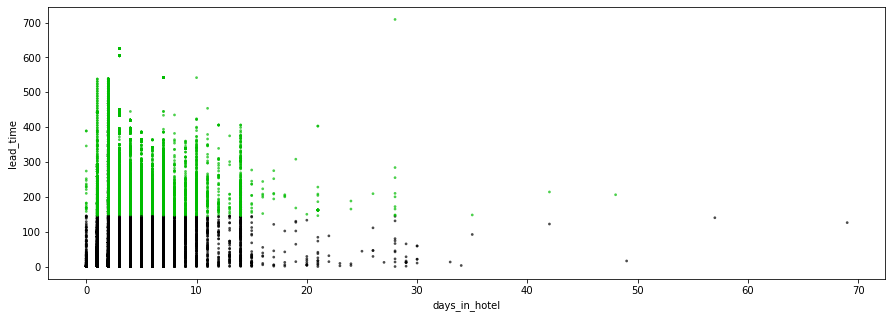

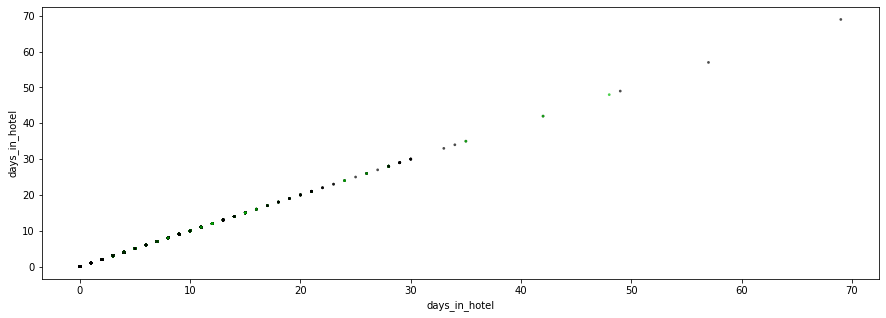

In [24]:
#Days in hotel vs others
for i in without_outliners_df:
    show_clusters('days_in_hotel', i, without_outliners_df, kmeans_result)

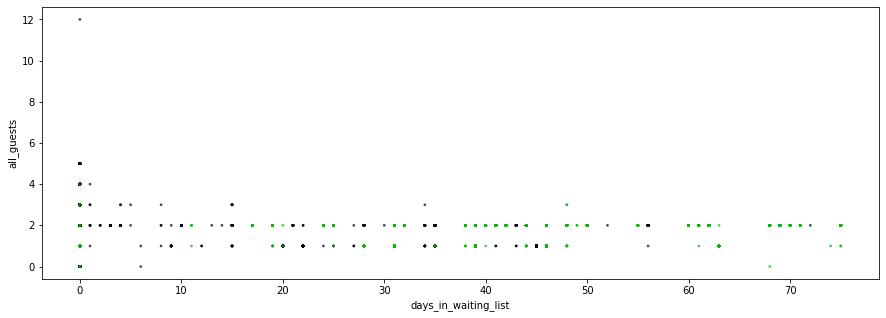

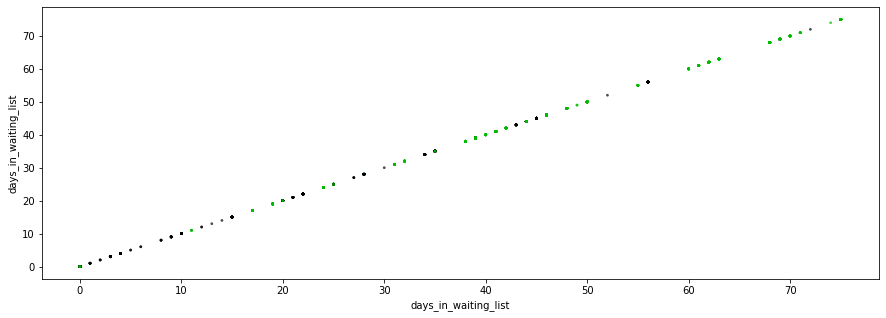

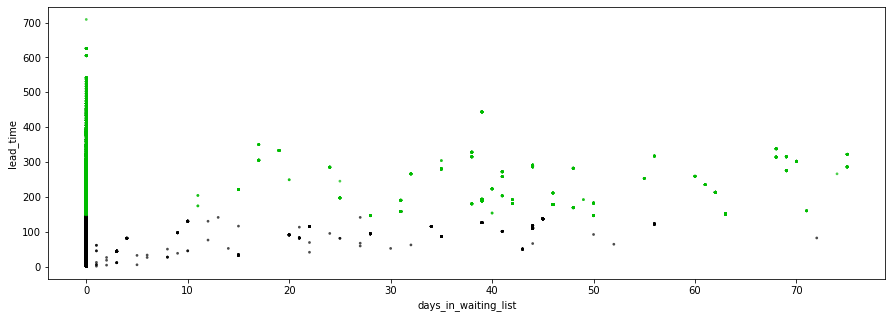

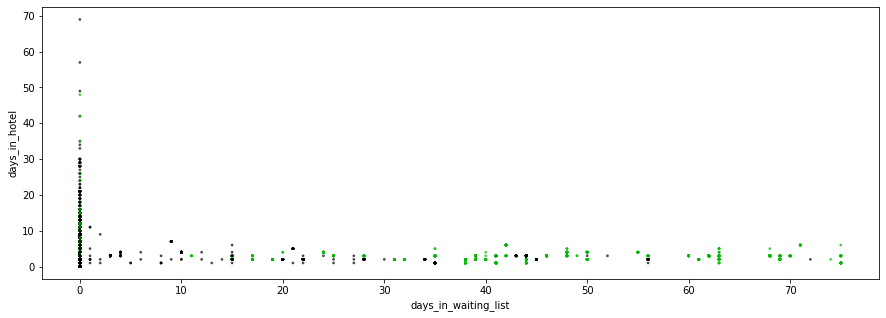

In [25]:
#days_in_waiting_list vs others
for i in without_outliners_df:
    show_clusters('days_in_waiting_list', i, without_outliners_df, kmeans_result)

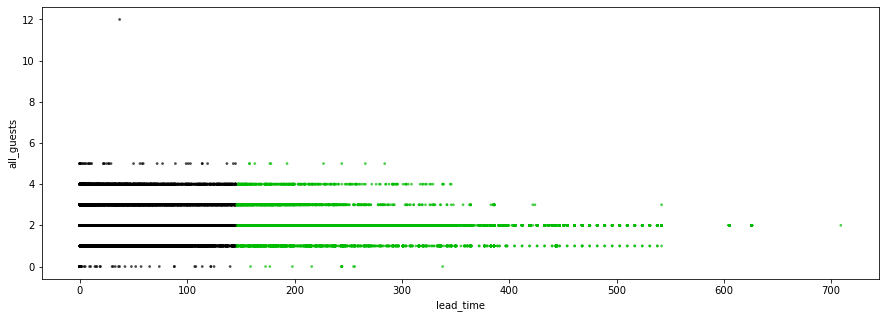

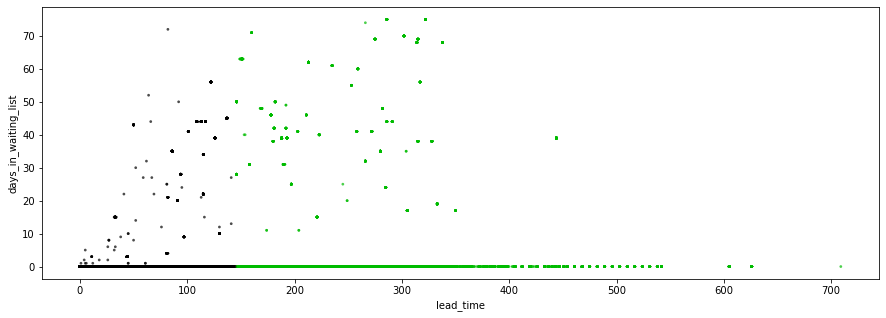

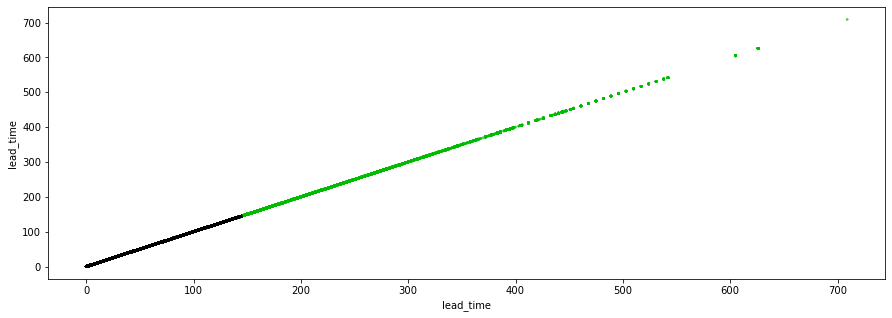

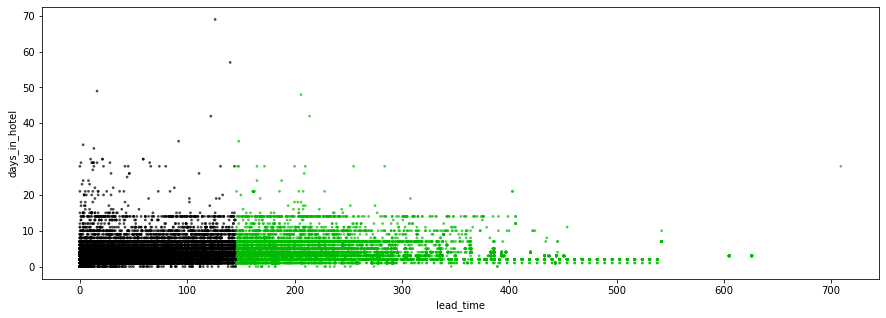

In [26]:
#lead_time vs others
for i in without_outliners_df:
    show_clusters('lead_time', i, without_outliners_df, kmeans_result)

In [27]:
#Klasyfikacja
from sklearn.neighbors import KNeighborsClassifier


In [40]:
#Usywamy jeden element, robimy klasyfikacje i sprawdzamy czy dobrze go przyporzadkowalo

def classify_and_check(idx):
    knn_clasifier = KNeighborsClassifier()
    knn_clasifier.fit(without_outliners_df[
        without_outliners_df.index != idx],
        [label for i, label in enumerate(kmeans_result.labels_) if i != idx]
    )

    prediction = knn_clasifier.predict(without_outliners_df[without_outliners_df.index == idx])
    return (prediction == kmeans_result.labels_[idx])[0]

In [42]:
classify_results = 0
for idx in without_outliners_df.index:
    classify_results += classify_and_check(idx)
    if idx % 1000 == 0:
        print("SAMPLES: " + str(idx+1) + "  " + str(100 * classify_results / (idx+1)) + "%")

SAMPLES: 1  100.0%
SAMPLES: 1001  100.0%
SAMPLES: 2001  100.0%
SAMPLES: 3001  100.0%
SAMPLES: 4001  100.0%
SAMPLES: 5001  99.4001199760048%
SAMPLES: 6001  91.86802199633395%
SAMPLES: 7001  90.28710184259391%
SAMPLES: 8001  91.26359205099362%
SAMPLES: 9001  92.20086657038107%
SAMPLES: 10001  92.35076492350765%
SAMPLES: 11001  91.56440323606945%
SAMPLES: 12001  90.4341304891259%


KeyboardInterrupt: 

In [36]:
without_outliners_df.index


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            56697, 56698, 56699, 56700, 56701, 56702, 56703, 56704, 56705,
            56706],
           dtype='int64', length=55843)

In [43]:
# Podzial na zbior uczacy i zbior testowy
len(without_outliners_df)


55843

In [46]:
#70% zbior uczacy (39 090), 30% testowy(16 753)
divider = 39090
train_set = without_outliners_df[:divider]
test_set = without_outliners_df[divider:]

kmeans_all = KMeans(n_clusters = 2, n_init=10, max_iter=350, random_state=42)
kmeans_result_all = kmeans_all.fit(without_outliners_df)

train_labels = kmeans_result_all.labels_[:divider]
test_labels = kmeans_result_all.labels_[divider:]

In [52]:
def classify_and_test(classifier):
    classifier = classifier.fit(train_set, train_labels)

    score = classifier.score(test_set, test_labels)
    print(str(type(classifier)) + " score: " + "{:.2f}%".format(score*100))

In [55]:
from sklearn.neighbors import KNeighborsClassifier

metrics = ['minkowski', 'cityblock', 'cosine']
for metric in metrics:
    for neigh in range(2, 16):
            knn_clasifier = KNeighborsClassifier(n_neighbors=neigh, metric=metric)
            classify_and_test(knn_clasifier)
    print()
    print()

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.98%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.98%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.98%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.96%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.96%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.98%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.96%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.97%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.96%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.97%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.97%
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> score: 99.97%
<class 'sklearn.neighbors._classification.KNeighbors

In [56]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
classify_and_test(clf)

<class 'sklearn.tree._classes.DecisionTreeClassifier'> score: 100.00%


All guests vs others


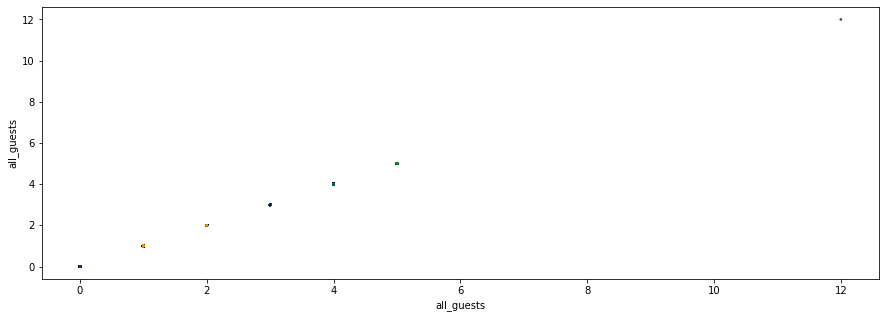

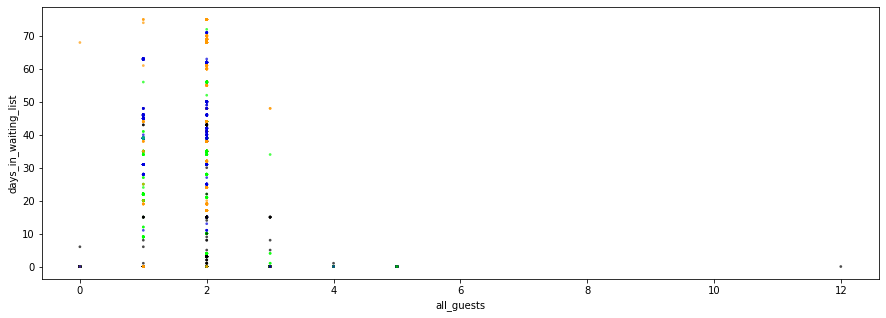

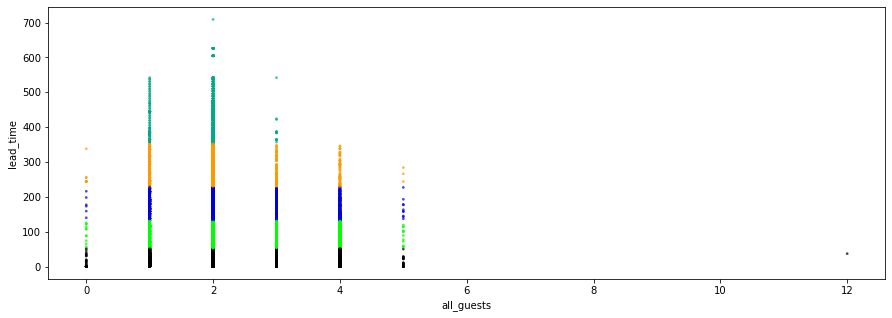

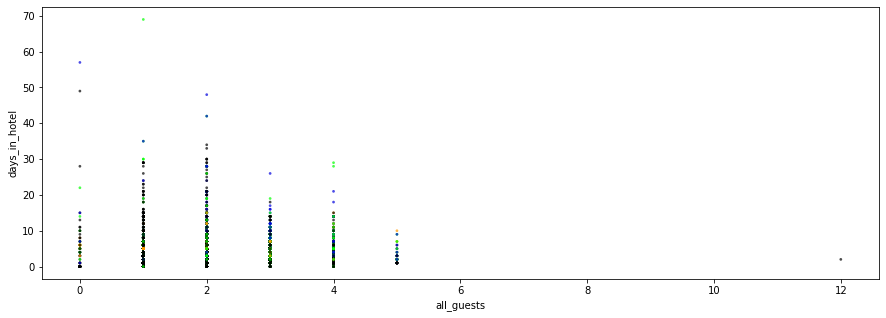

Days in hotel vs others


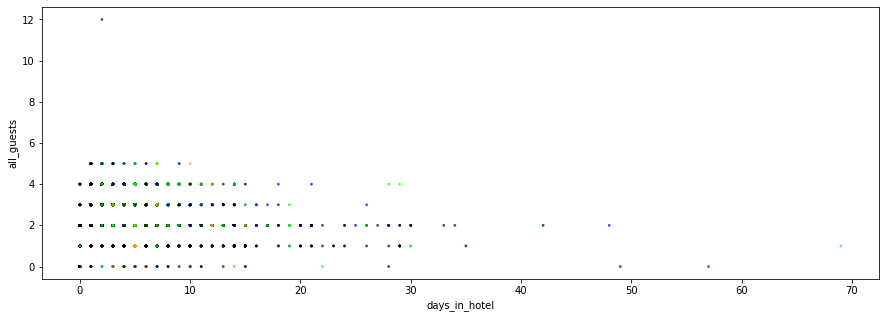

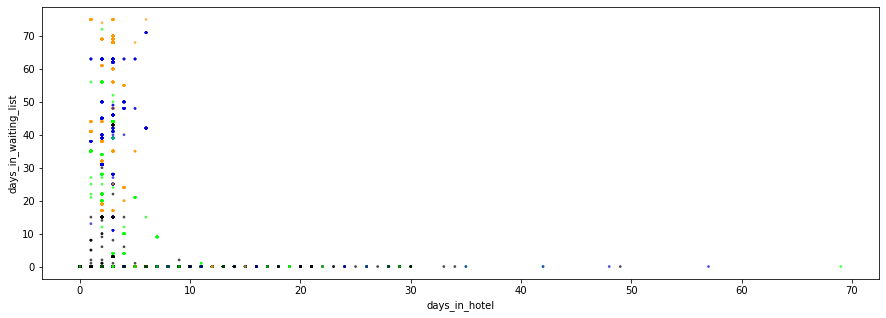

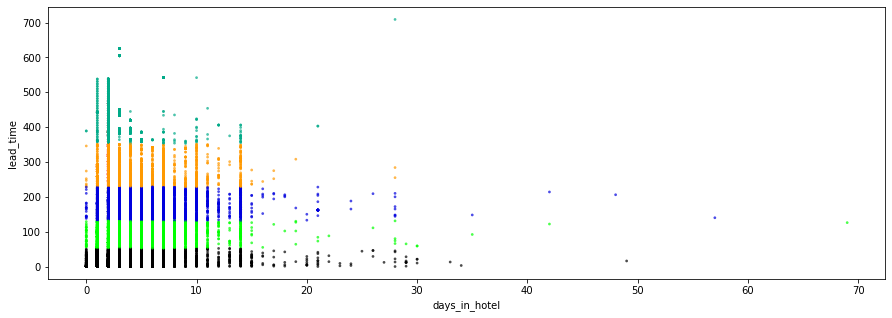

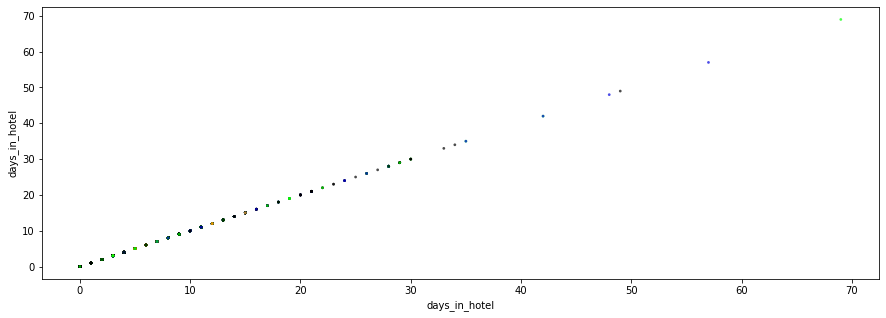

days_in_waiting_list vs others


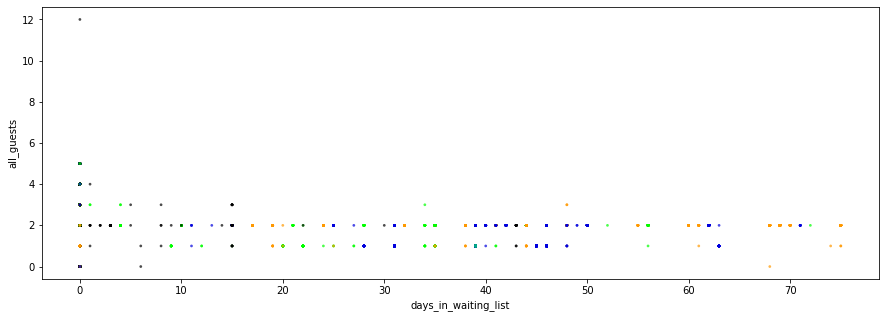

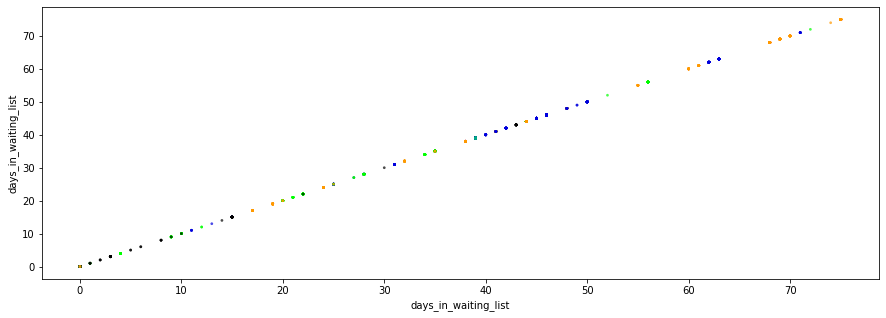

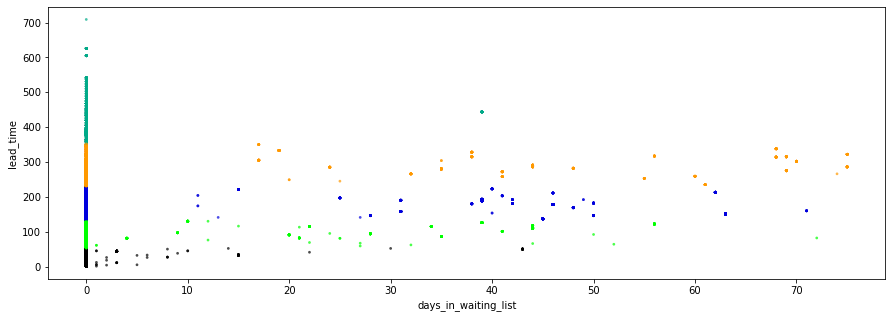

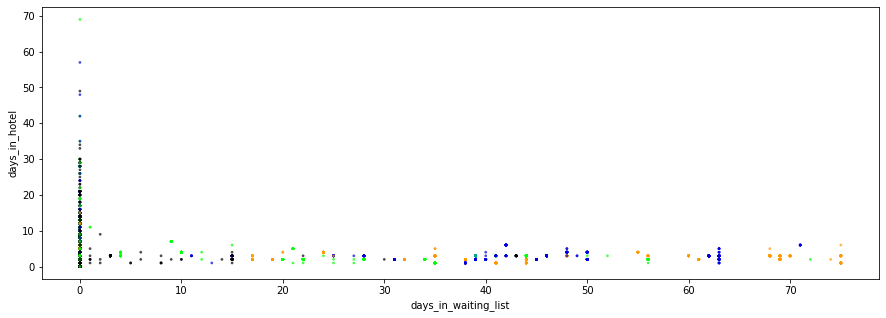

lead_time vs others


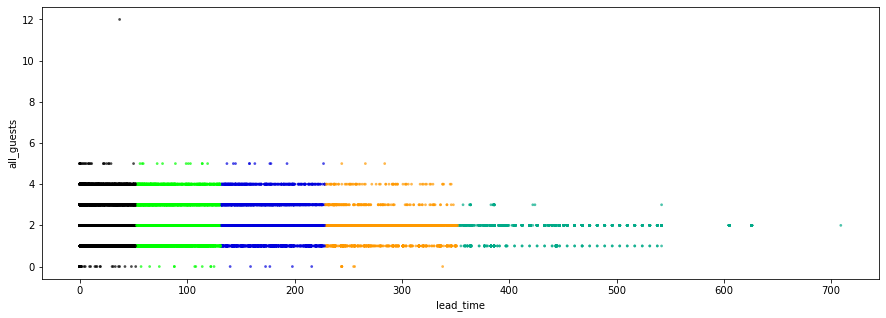

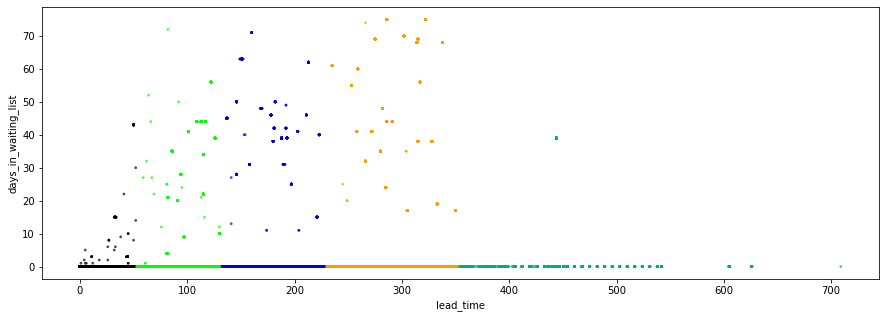

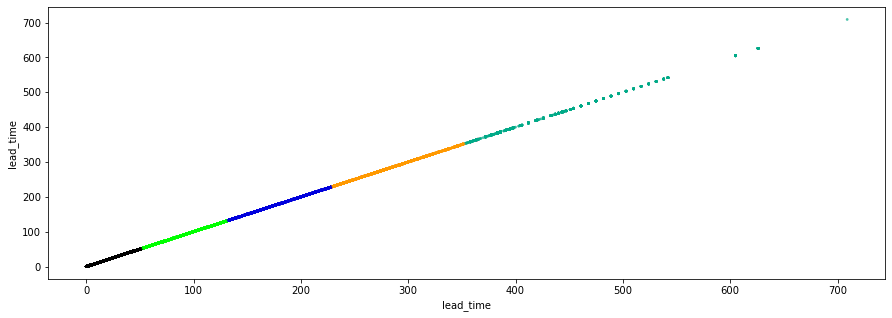

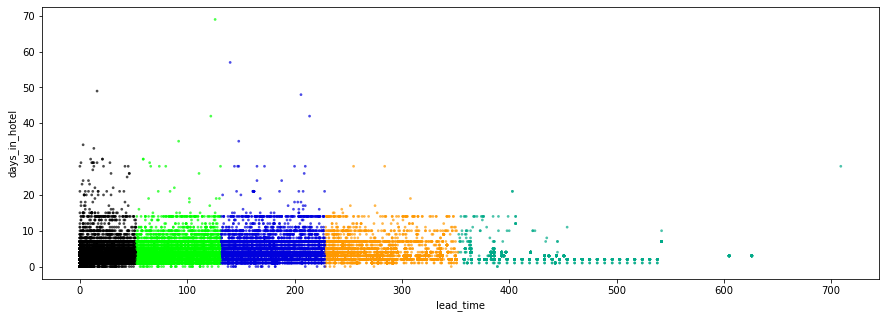

In [57]:
#A co dla np dla 5 klastrow
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=350, random_state=42)
kmeans_result = kmeans.fit(without_outliners_df)

print("All guests vs others")
for i in without_outliners_df:
    show_clusters('all_guests', i, without_outliners_df, kmeans_result)
    
print("Days in hotel vs others")
for i in without_outliners_df:
    show_clusters('days_in_hotel', i, without_outliners_df, kmeans_result)
    
print("days_in_waiting_list vs others")
for i in without_outliners_df:
    show_clusters('days_in_waiting_list', i, without_outliners_df, kmeans_result)
    
print("lead_time vs others")
for i in without_outliners_df:
    show_clusters('lead_time', i, without_outliners_df, kmeans_result)   
    


In [ ]:
#Wywalic lead_time(wczesniejsza reserwacja)?